# Power Cozmo Practical Tasks : Harshit Tyagi

## Problem 1. Build knowledge graph with simple schema

In [1]:
!pip install networkx -q

In [2]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def scrape_wikipedia(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract name
    name = soup.find('h1', {'class': 'firstHeading'}).text.strip()

    # Extract birthdate
    birthdate_element = soup.find('span', {'class': 'bday'})
    birthdate = birthdate_element.text.strip() if birthdate_element else None

    # Extract nickname
    nick_name = None
    nick_section = soup.find('th', string='Nickname')
    if nick_section:
        nick_name = nick_section.find_next('td').text.strip()

    # Extract height
    height = None
    height = soup.find('th', string='Height')
    if height:
        height = height.find_next('td').text.strip()

    # Extract t20 jersey no.
    t20 = None
    t20 = soup.find('th', string='T20I shirt no.')
    if t20:
        t20 = t20.find_next('td').text.strip()

    return name, birthdate, nick_name, height, t20


In [4]:
# Function to create a simple knowledge graph
def create_knowledge_graph(name, birthdate, nick_name, height, t20):
    graph = nx.Graph()
    
    # nodes
    graph.add_node(name, type="Person")
    graph.add_node(birthdate, type="Birthdate")
    graph.add_node(nick_name, type="NickName")
    graph.add_node(height, type="Height")
    graph.add_node(t20, type="T20")

    # edges
    graph.add_edge(name, birthdate, label = "Birthdate")
    graph.add_edge(name, nick_name, label = "Nickname")
    graph.add_edge(name, height, label = "Height")
    graph.add_edge(name, t20, label = "T20 shirt no.")

    return graph

In [5]:
# Function to visualize the knowledge graph
def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue")
    labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

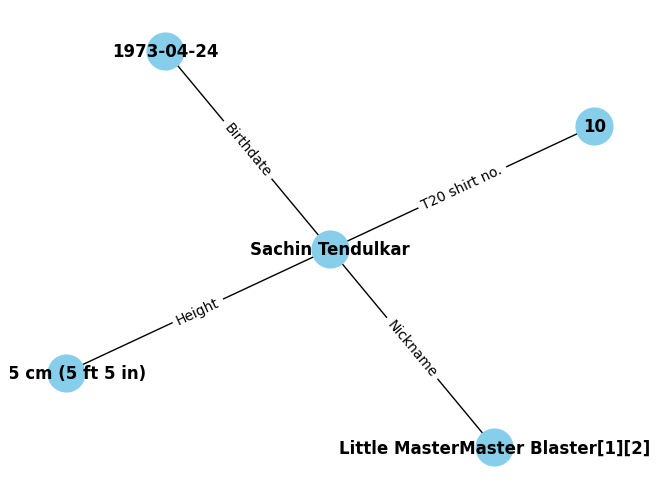

In [6]:
wikipedia_url = "https://en.wikipedia.org/wiki/Sachin_Tendulkar"
name, birthdate, nick_name, height, t20 = scrape_wikipedia(wikipedia_url)
knowledge_graph = create_knowledge_graph(name, birthdate, nick_name, height, t20)
visualize_graph(knowledge_graph)

## Problem 2. Add new function with existing function as inheritance class

In [7]:
class Person:
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

class Student(Person):
    def __init__(self, fname, lname, year, percentage):
        super().__init__(fname, lname)
        self.graduationyear = year
        self.percentage = percentage


x = Student("Mike", "Olsen", 2019, 85.5)

In [8]:
x.percentage

85.5

## Problem 3. Balancing the Credit Card Dataset

In [9]:
# Installing the dependencies

!pip install --upgrade pip -q
!pip install pandas -q
!pip install -U scikit-learn -q
!pip install imblearn -q

In [10]:
# Importing the Dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Loading the Data

In [11]:
# Reading the Data

df = pd.read_csv("creditcard.csv")

### EDA

In [12]:
# Checking the column names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# Checking how the data looks

df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265719,162018.0,-0.143626,1.253103,0.581354,2.652189,1.109886,0.385546,0.829708,0.087460,-1.613336,...,0.389492,1.066370,-0.344586,-0.497926,-0.036704,0.168776,-0.091818,0.020032,10.62,0
231242,146666.0,2.303208,-1.345377,-1.283352,-1.834267,-0.694129,0.022179,-1.102699,-0.069808,-1.563745,...,-0.154174,0.035926,0.162136,0.091157,-0.074047,-0.177765,0.002649,-0.058625,20.00,0
261756,160167.0,-0.875195,1.221299,0.633522,-0.314527,1.263933,-0.465620,1.526827,-0.071029,-0.811213,...,0.074672,0.125680,-0.699552,-0.436583,1.275740,-0.455185,-0.158111,0.017659,1.00,0


In [14]:
# Checking unique values in Class feature

df.Class.nunique()

2

In [15]:
# Checking the counts of each unique values in Class feature

df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Note : Please Read

##### As I can see that the target variable is column "Class" and it is filled with the 0 and 1 value might which interprets as Good Custome an Potential default customer.
##### There is a substential difference between the count of 0 and 1. Which is generally not ideal for running ML models. So that we nned to balance this data.

#### Few common wast to make your data balanced are:
##### Under Sampling : I can remove samples from the class 0 which is over-represented class here
##### Over sampling: I can duplicate or generate synthetic examples for Class 1

##### Instead of removing values of calss 0 (in which I loose my data) or duplicateing the values. I can assign different weights to different classes during the model training, by which I can give more importance to minority class.

##### In my past experience working on a banking project dealing with similar usecase, I collected more data of defaulter users and used Random Forest algo which handles imbalanced datasets better. 

##### But if that solution is not providing good results most used technique is SMOTE, which can create synthetic samples.

In [16]:
# Creating Input and output from data

X = df.drop('Class', axis=1)
y = df["Class"]

In [17]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [18]:
# Apply SMOTE to the training set only

smote = SMOTE(random_state=42)
X_resamp, y_resamp = smote.fit_resample(X_train, y_train)

# Now, X_resamp and y_resamp contain the synthetic samples generated by SMOTE

In [19]:
y_resamp.value_counts()

Class
0    199008
1    199008
Name: count, dtype: int64

##### Now we can fit  ML model and check for the accuracy

## Problem 4. Build end to end ml pipeline with flower dataset

##### Tensorflow is not installing in my system (its trick to install Tensorflow in Mac M1)

##### And for loading that flower kaggle data Tensorflow and Keras are needed. Performing similar tasks on Scikit Learn preloaded datasets

In [20]:
# Importing dependencies

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#### Using Support Vector Machine Model

In [21]:
# Loading the data

iris = load_iris()
X = iris.data  # Input Variables
y = iris.target # Output Variables

It is similar to the Kaggle Flower data, but already converted to a metrix 

In [22]:
# I am using standard scaler (Z score Normalization) for normalising the data (MinMaxScaler() can be used too)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

In [24]:
# Using SVM Model

svm = SVC(kernel='linear', C=1) #C is regularization parameter
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [25]:
# Making predictions on the test set

y_pred = svm.predict(X_test)

In [26]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [27]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

